In [26]:
%matplotlib inline

In [19]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import KFold, train_test_split, cross_val_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
import numpy as np
from sklearn.externals.six.moves import zip
import matplotlib.pyplot as plt

In [3]:
X_array = np.load('outputMatrix_userTrimmed.npz')
X = X_array['matrix']

In [4]:
# remove features with low variance (ie more than 80% samples have same value)
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
X_sel = sel.fit_transform(X)
X_sel.shape

(3047, 2838)

In [ ]:
# alternative: PCA for dimensionality reduction
sel = PCA()
pca = sel.fit(X)
print pca.explained_variance_ratio_
X_sel = sel.fit_transform(X)

In [5]:
y_array = np.load('user_class_array_scheme2.npz')
y_np = y_array['matrix']
y = y_np.tolist()[0]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_sel, y, test_size=0.1,
                                                    random_state=9)

In [50]:
dt = DecisionTreeClassifier(max_depth=20)
dt.fit(X_train, y_train)
dt.score(X_test, y_test)

0.77704918032786885

In [39]:
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=20),
                        n_estimators=600,
                        learning_rate=1.5)

In [40]:
bdt.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
          learning_rate=1.5, n_estimators=600, random_state=None)

In [41]:
test_errors = []

for test_predict in bdt.staged_predict(X_test):
    test_errors.append(1. - accuracy_score(test_predict, y_test))
    
n_trees = len(bdt)

In [42]:
estimator_errors = bdt.estimator_errors_[:n_trees]
estimator_weights = bdt.estimator_weights_[:n_trees]

In [48]:
min(estimator_errors)

2.8804596055241039e-14

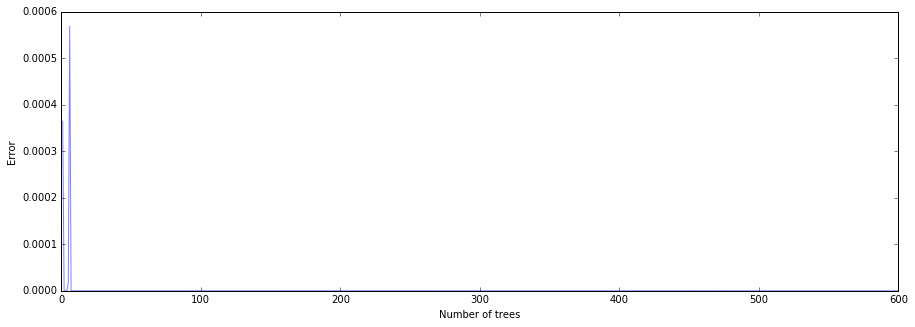

In [45]:
plt.figure(figsize=(15, 5))
plt.plot(range(1, n_trees + 1), estimator_errors, 'b', alpha=0.5)
plt.legend()
plt.ylabel('Error')
plt.xlabel('Number of trees')